In [53]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [54]:
top = Table.read_table('../../Computation_with_Python/Data/top_movies_2017.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top.set_format(['Gross', 'Gross (Adjusted)'], NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [55]:
top.labels

('Row Index', 'Title', 'Studio', 'Gross', 'Gross (Adjusted)', 'Year')

In [56]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, start+5))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937
10,Star Wars: The Force Awakens,Buena Vista,"936,662,225","961,143,200",2015
11,101 Dalmatians,Disney,"144,880,014","888,264,400",1961
12,The Empire Strikes Back,Fox,"290,475,067","872,825,900",1980
13,Ben-Hur,MGM,"74,000,000","871,220,000",1959


In [57]:
top.sample(5)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
137,Transformers: Dark of the Moon,Paramount/Dreamworks,"352,390,543","393,479,300",2011
195,9 to 5,Fox,"103,290,500","341,357,800",1980
54,Finding Nemo,Buena Vista,"380,843,261","547,504,100",2003
41,Cleopatra (1963),Fox,"57,777,778","597,261,000",1963
171,Minions,Universal,"336,045,770","361,949,600",2015


In [58]:
top.sample(500).group('Title')

Title,count
101 Dalmatians,2
2001: A Space Odyssey,3
9 to 5,4
Airport,2
Aladdin,2
Alice in Wonderland (2010),1
American Graffiti,1
American Sniper,1
An Officer and a Gentleman,3
Apollo 13,3


In [59]:
top.sample(100).group('Title')

Title,count
101 Dalmatians,1
Airport,1
Aladdin,1
Apollo 13,1
Around the World in 80 Days,1
Avengers: Age of Ultron,1
Batman Forever,1
Batman v Superman: Dawn of Justice,1
Beauty and the Beast,1
Beverly Hills Cop,2


In [60]:
top.sample(100, with_replacement=False).group('Title')

Title,count
101 Dalmatians,1
9 to 5,1
An Officer and a Gentleman,1
Apollo 13,1
Armageddon,1
Back to the Future,1
Bambi,1
Batman Returns,1
Batman v Superman: Dawn of Justice,1
Beauty and the Beast,1


In [61]:
dice = make_array(np.arange(1,7))
dice

array([[1, 2, 3, 4, 5, 6]])

In [62]:
united = Table.read_table('../Data/united.csv')
united.show(3)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3


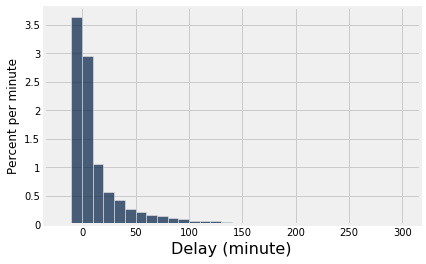

In [63]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-20, 301, 10))

delay_hist(united)

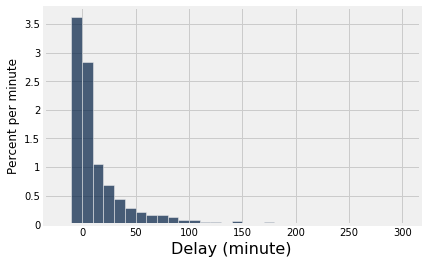

In [64]:
delay_hist(united.sample(1000))

In [65]:
dice_trial = Table().with_column('Face', np.arange(1,7))
dice_trial.sample(4)

Face
2
5
2
3


In [66]:
rolls = np.random.choice(np.arange(1,7), 4)
rolls

array([4, 6, 3, 5])

In [67]:
sum(rolls==6)

1

In [68]:
eligible_population = make_array(0.26, 0.74)

In [69]:
sample_proportions(100, eligible_population)

array([0.22, 0.78])

In [70]:
both_counts = 100 * sample_proportions(100, eligible_population)
both_counts

array([33., 67.])

In [71]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    sample_distribution = sample_proportions(100, eligible_population)
    sampled_count = (100 * sample_distribution).item(0)
    counts = np.append(counts, sampled_count)

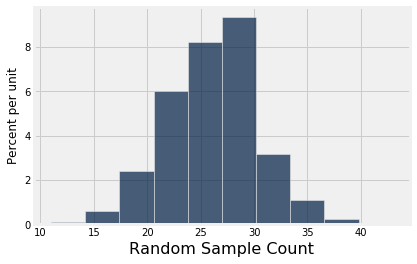

In [72]:
Table().with_column('Random Sample Count', counts).hist()

In [73]:
help(sample_proportions)

Help on function sample_proportions in module datascience.util:

sample_proportions(sample_size, probabilities)
    Return the proportion of random draws for each outcome in a distribution.
    
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
    
        ``probabilities``: An array of probabilities that forms a distribution.
    
    Returns:
        An array with the same length as ``probability`` that sums to 1.



In [74]:
sample_proportions(5, eligible_population)

array([0.2, 0.8])

In [75]:
np.random.multinomial(100, eligible_population)

array([26, 74])

In [76]:
pop_prob = make_array(0.26, 1-0.26)
outcome = sample_proportions(5, pop_prob)

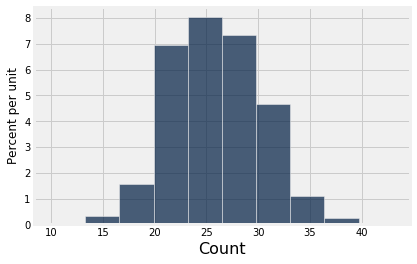

In [77]:
trial = 10000
outcome = make_array()
for i in np.arange(trial):
    sample = sample_proportions(100, pop_prob)*100
    outcome = np.append(outcome, sample.item(0))
outcome_table = Table().with_column('Count', outcome)
outcome_table.hist()

In [78]:
model = make_array(0.75,0.25)


In [79]:
sample_proportions(929, model)

array([0.74058127, 0.25941873])

In [80]:
percent_purpose = (100 * sample_proportions(929, model)).item(0)

In [81]:
percent_purpose

74.16576964477933

In [82]:
abs(percent_purpose - 75)

0.8342303552206687

In [83]:
distance = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    one_distance = abs((100 * sample_proportions(929, model)).item(0) - 75)
    distance = np.append(distance, one_distance)

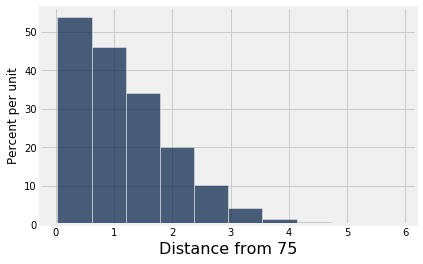

In [84]:
Table().with_column('Distance from 75', distance).hist()

In [85]:
def run_simulation(num, model):
    assumption = model.item(0) * 100
    distance = make_array()
    repetitions = 10000
    for i in np.arange(repetitions):
        one_distance = abs((100 * sample_proportions(num, model)).item(0)-assumption)
        distance = np.append(distance, one_distance)
    return distance

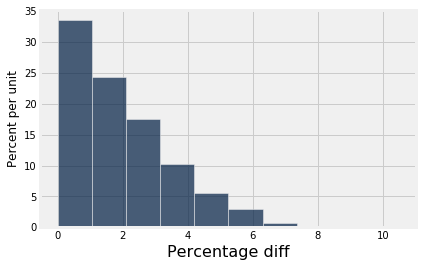

In [86]:
a1 = run_simulation(400, make_array(0.5,0.5))
Table().with_column('Percentage diff', a1).hist()

In [87]:
model = make_array(0.5,0.5)
model.item(0)

0.5

In [88]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry i

In [89]:
player_data = Table.read_table('../Data/player_data.csv')
player_data.show(3)
salary_data = Table.read_table('../Data/salary_data.csv')
salary_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


In [90]:
full_data = salary_data.join('PlayerName', player_data, 'Name')
full_data.show(3)

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


In [91]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = np.arange(min(ages), max(ages)+2, 1)
    salary_bins = np.arange(min(salaries), max(salaries)+2000000, 1000000)
    t.hist('Age', bins=age_bins, unit='year')
    t.hist('Salary', bins=salary_bins, unit='$')
    return age_bins # Keep this statement so that your work can be checked
    

In [92]:
old = full_data.with_column('Age', full_data.column('Age')*3)
old.show(3)

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,84,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,90,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,57,ORL,47,169,33,21,22,38,243


115

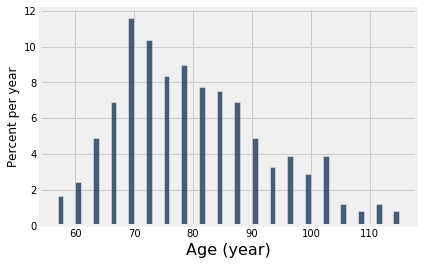

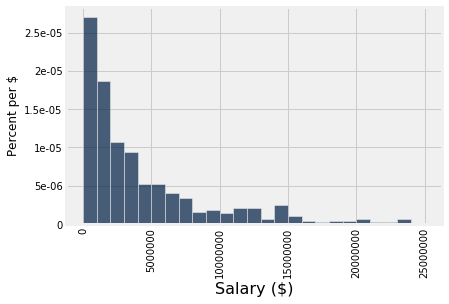

In [93]:
np.max(histograms(old))

In [94]:
np.max(old.column('Age'))

114

In [96]:
np.arange(min(old.column('Age')), max(old.column('Age'))+1)

array([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114])

In [97]:
np.arange(57, 115)

array([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114])